# LDA parameter optimisation

What has to be optimised:  
1. Number of topics for LDA 
2. Which topics can be merged
3. Vocabulary size

Packages to install:  

* The python package 'gensim' is used to implement LDA. This has certain metrics which the scikit-learn implementation does not have. Installation instructions can be found [here](https://radimrehurek.com/gensim/install.html).
* pyLDAvis is used to visualize the topic clusters. Installation instructions can be found [here](https://pyldavis.readthedocs.io/en/latest/readme.html)
* [Spacy](https://spacy.io/usage/), an NLP tool for lemmatization. Also execute the code `python3 -m spacy download en` to download the English language model
* NumPy, pymongo, pandas, matplotlib, nltk and sklearn

In [33]:
# imports

from __future__ import print_function
from time import time
import numpy as np
import pandas as pd
from pymongo import MongoClient
import pickle 
import random

# Sklearn
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re, nltk, spacy
from polyglot.text import Text

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
from pyLDAvis import gensim as pyLDAvisgensim
import matplotlib.pyplot as plt

The next cell contains code to read newspapers from the MongoDB database. Enter the database name when prompted, which contains the articles in media-db, eg "DigitalIndia_articles_Final"

In [34]:
client = MongoClient('mongodb://act4dgem.cse.iitd.ac.in:27017')
db = client['eventwise_media-db']

# ---------------------------------------------------------------------------------------------#
table_name = input('Enter db name: ')
coll = db[table_name]

print("Loading dataset...")
t0 = time()
cursor = coll.find()

doc_set = []
url_doc_set = []
words_doc_set = []
article_data = []
newsp_doc_set = []

count = 0
for art in cursor:
    count = count + 1
    print('Article# ', count)
    url = art['url']
    text = art['text']
    source = art['source']
    
    words = len(text.split())
    doc_set.append(text)
    url_doc_set.append(url)
    words_doc_set.append(words)
    newsp_doc_set.append(source)

print("done in %0.3fs." % (time() - t0))

Enter db name: GST_articles_hindi
Loading dataset...
Article#  1
Article#  2
Article#  3
Article#  4
Article#  5
Article#  6
Article#  7
Article#  8
Article#  9
Article#  10
Article#  11
Article#  12
Article#  13
Article#  14
Article#  15
Article#  16
Article#  17
Article#  18
Article#  19
Article#  20
Article#  21
Article#  22
Article#  23
Article#  24
Article#  25
Article#  26
Article#  27
Article#  28
Article#  29
Article#  30
Article#  31
Article#  32
Article#  33
Article#  34
Article#  35
Article#  36
Article#  37
Article#  38
Article#  39
Article#  40
Article#  41
Article#  42
Article#  43
Article#  44
Article#  45
Article#  46
Article#  47
Article#  48
Article#  49
Article#  50
Article#  51
Article#  52
Article#  53
Article#  54
Article#  55
Article#  56
Article#  57
Article#  58
Article#  59
Article#  60
Article#  61
Article#  62
Article#  63
Article#  64
Article#  65
Article#  66
Article#  67
Article#  68
Article#  69
Article#  70
Article#  71
Article#  72
Article#  73
Article

Article#  1367
Article#  1368
Article#  1369
Article#  1370
Article#  1371
Article#  1372
Article#  1373
Article#  1374
Article#  1375
Article#  1376
Article#  1377
Article#  1378
Article#  1379
Article#  1380
Article#  1381
Article#  1382
Article#  1383
Article#  1384
Article#  1385
Article#  1386
Article#  1387
Article#  1388
Article#  1389
Article#  1390
Article#  1391
Article#  1392
Article#  1393
Article#  1394
Article#  1395
Article#  1396
Article#  1397
Article#  1398
Article#  1399
Article#  1400
Article#  1401
Article#  1402
Article#  1403
Article#  1404
Article#  1405
Article#  1406
Article#  1407
Article#  1408
Article#  1409
Article#  1410
Article#  1411
Article#  1412
Article#  1413
Article#  1414
Article#  1415
Article#  1416
Article#  1417
Article#  1418
Article#  1419
Article#  1420
Article#  1421
Article#  1422
Article#  1423
Article#  1424
Article#  1425
Article#  1426
Article#  1427
Article#  1428
Article#  1429
Article#  1430
Article#  1431
Article#  1432
Article#  

Article#  2617
Article#  2618
Article#  2619
Article#  2620
Article#  2621
Article#  2622
Article#  2623
Article#  2624
Article#  2625
Article#  2626
Article#  2627
Article#  2628
Article#  2629
Article#  2630
Article#  2631
Article#  2632
Article#  2633
Article#  2634
Article#  2635
Article#  2636
Article#  2637
Article#  2638
Article#  2639
Article#  2640
Article#  2641
Article#  2642
Article#  2643
Article#  2644
Article#  2645
Article#  2646
Article#  2647
Article#  2648
Article#  2649
Article#  2650
Article#  2651
Article#  2652
Article#  2653
Article#  2654
Article#  2655
Article#  2656
Article#  2657
Article#  2658
Article#  2659
Article#  2660
Article#  2661
Article#  2662
Article#  2663
Article#  2664
Article#  2665
Article#  2666
Article#  2667
Article#  2668
Article#  2669
Article#  2670
Article#  2671
Article#  2672
Article#  2673
Article#  2674
Article#  2675
Article#  2676
Article#  2677
Article#  2678
Article#  2679
Article#  2680
Article#  2681
Article#  2682
Article#  

Article#  4366
Article#  4367
Article#  4368
Article#  4369
Article#  4370
Article#  4371
Article#  4372
Article#  4373
Article#  4374
Article#  4375
Article#  4376
Article#  4377
Article#  4378
Article#  4379
Article#  4380
Article#  4381
Article#  4382
Article#  4383
Article#  4384
Article#  4385
Article#  4386
Article#  4387
Article#  4388
Article#  4389
Article#  4390
Article#  4391
Article#  4392
Article#  4393
Article#  4394
Article#  4395
Article#  4396
Article#  4397
Article#  4398
Article#  4399
Article#  4400
Article#  4401
Article#  4402
Article#  4403
Article#  4404
Article#  4405
Article#  4406
Article#  4407
Article#  4408
Article#  4409
Article#  4410
Article#  4411
Article#  4412
Article#  4413
Article#  4414
Article#  4415
Article#  4416
Article#  4417
Article#  4418
Article#  4419
Article#  4420
Article#  4421
Article#  4422
Article#  4423
Article#  4424
Article#  4425
Article#  4426
Article#  4427
Article#  4428
Article#  4429
Article#  4430
Article#  4431
Article#  

Article#  5866
Article#  5867
Article#  5868
Article#  5869
Article#  5870
Article#  5871
Article#  5872
Article#  5873
Article#  5874
Article#  5875
Article#  5876
Article#  5877
Article#  5878
Article#  5879
Article#  5880
Article#  5881
Article#  5882
Article#  5883
Article#  5884
Article#  5885
Article#  5886
Article#  5887
Article#  5888
Article#  5889
Article#  5890
Article#  5891
Article#  5892
Article#  5893
Article#  5894
Article#  5895
Article#  5896
Article#  5897
Article#  5898
Article#  5899
Article#  5900
Article#  5901
Article#  5902
Article#  5903
Article#  5904
Article#  5905
Article#  5906
Article#  5907
Article#  5908
Article#  5909
Article#  5910
Article#  5911
Article#  5912
Article#  5913
Article#  5914
Article#  5915
Article#  5916
Article#  5917
Article#  5918
Article#  5919
Article#  5920
Article#  5921
Article#  5922
Article#  5923
Article#  5924
Article#  5925
Article#  5926
Article#  5927
Article#  5928
Article#  5929
Article#  5930
Article#  5931
Article#  

In [5]:
# Pickle the document set so that the previous cell does not have to be run each time, you can use this to load the doc_set directly for further testing
# with open("doc_set_farmers.pkl", "wb") as pickle_out:
#     pickle.dump(doc_set, pickle_out)

# once pickled, can load it as 
with open("./Aspects/doc_set_farmers.pkl", "rb") as pickle_in:
    doc_set = pickle.load(pickle_in)

In [5]:
df = pd.DataFrame(doc_set)
df.columns = ['text']

In [6]:
# Convert to list
data = df.text.values.tolist()

# Remove @ characters, newlines, single quotes
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

<>:5: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \S
<>:6: DeprecationWarning: invalid escape sequence \s
<ipython-input-6-70cdd761040c>:5: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-6-70cdd761040c>:6: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


[' नई दिल्ली, जेएनएन। ट्राई के नए नियम के लागू होने में अब महज दो दिन बचे हैं। '
 'टेलीकॉम रेगुलेटरी अथॉरिटी ऑफ इंडिया (ट्राई) ने हाल ही में निर्देश जारी किए '
 'हैं जिसके बाद ब्रॉडकास्ट सेक्टर को अपने ग्राहक को चैनल चुनने और उसी के '
 'मुताबिक भुगतान करने का विकल्प देना होगा। ट्राई के इस आदेश के बाद खबरें आ '
 'रहीं थीं कि पहले से सब्सक्राइब्ड चैनलों की सेवा भी बाधित हो सकती है। हालांकि '
 'ट्राई ने इसका खंडन किया है और पूरे मामले में सफाई दी है। ट्राई की ओर से जारी '
 'की गई रिपोर्ट में कहा गया है कि हम यह स्पष्ट करना चाहते हैं कि नए नियम की '
 'वजह से टीवी के प्रसारण सेवा में कोई बाधा नहीं आएगी। हालांकि,इसका असर आपके '
 'पॉकेट पर पड़ेगा यह सब आपके केबल ऑपरेटर्स और डीटीएच सर्विस प्रोवाइडर पर '
 'निर्भर करेगा। फिलहाल डीटीएच सर्विस प्रोवाइडर भी नई कीमतों के आधार पर अपने '
 'पैकेज बनाने में लगे हैं। अब तक यह डीटीएच सर्विस प्रोवाइडर्स वेबसाइट्स और '
 'अपने चैनल्स के माध्यम से लोगों को नए पैक्स की जानकारी दे रहे हैं। बहरहाल '
 'वक्त कम बचा है और आम उपभोक्ता के मन में सबसे पहला सवाल यह है 

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['नई', 'लल', 'जएनएन', 'टर', 'नए', 'यम', 'अब', 'महज', 'बच', 'टल', 'रगलटर', 'अथ', 'ऑफ', 'इड', 'टर', 'रदश', 'सक', 'बर', 'डक', 'सट', 'सकटर', 'अपन', 'गर', 'हक', 'चनल', 'चनन', 'और', 'उस', 'मत', 'भगत', 'करन', 'कलप', 'दन', 'टर', 'इस', 'आदश', 'खबर', 'रह', 'पहल', 'सबसकर', 'इबड', 'चनल', 'सव', 'सकत', 'टर', 'इसक', 'खडन', 'और', 'पर', 'मल', 'सफ', 'टर', 'ओर', 'गई', 'रट', 'कह', 'गय', 'हम', 'यह', 'सपषट', 'करन', 'हत', 'नए', 'यम', 'वजह', 'परस', 'रण', 'सव', 'नह', 'आएग', 'इसक', 'असर', 'आपक', 'कट', 'पर', 'पडग', 'यह', 'सब', 'आपक', 'कबल', 'ऑपरटरस', 'और', 'एच', 'सरव', 'पर', 'इडर', 'पर', 'रभर', 'करग', 'लह', 'एच', 'सरव', 'पर', 'इडर', 'नई', 'मत', 'आध', 'पर', 'अपन', 'पकज', 'बन', 'लग', 'अब', 'तक', 'यह', 'एच', 'सरव', 'पर', 'इडरस', 'वबस', 'इटस', 'और', 'अपन', 'चनलस', 'धयम', 'नए', 'पकस', 'नक', 'रह', 'बहरह', 'वकत', 'कम', 'बच', 'और', 'आम', 'उपभ', 'कत', 'मन', 'सबस', 'पहल', 'सव', 'यह', 'सबर', 'कय', 'कय', 'उसन', 'पक', 'रख', 'वह', 'रहग', 'नए', 'पकस', 'एच', 'सरव', 'पर', 'इडरस', 'उपलबध', 'करव', 'एग', 'इनक', 'मत', 'लकर', 'अभ', 

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram is to use the Phraser interface
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigrams and trigrams example
print(trigram_mod[bigram_mod[data_words[0]]])

['नई', 'लल', 'जएनएन', 'टर', 'नए', 'यम', 'अब', 'महज', 'बच', 'टल', 'रगलटर', 'अथ', 'ऑफ', 'इड', 'टर', 'रदश', 'सक', 'बर', 'डक', 'सट', 'सकटर', 'अपन', 'गर', 'हक', 'चनल_चनन', 'और', 'उस', 'मत', 'भगत', 'करन', 'कलप', 'दन', 'टर', 'इस', 'आदश', 'खबर', 'रह', 'पहल', 'सबसकर', 'इबड', 'चनल', 'सव', 'सकत', 'टर', 'इसक', 'खडन', 'और', 'पर', 'मल', 'सफ', 'टर', 'ओर', 'गई', 'रट', 'कह', 'गय', 'हम', 'यह', 'सपषट', 'करन', 'हत', 'नए', 'यम', 'वजह', 'परस', 'रण', 'सव', 'नह', 'आएग', 'इसक', 'असर', 'आपक', 'कट', 'पर', 'पडग', 'यह', 'सब', 'आपक', 'कबल', 'ऑपरटरस', 'और', 'एच', 'सरव', 'पर', 'इडर', 'पर', 'रभर', 'करग', 'लह', 'एच', 'सरव', 'पर', 'इडर', 'नई', 'मत', 'आध', 'पर', 'अपन', 'पकज', 'बन', 'लग', 'अब', 'तक', 'यह', 'एच', 'सरव', 'पर', 'इडरस', 'वबस_इटस', 'और', 'अपन', 'चनलस', 'धयम', 'नए', 'पकस', 'नक', 'रह', 'बहरह', 'वकत', 'कम', 'बच', 'और', 'आम', 'उपभ_कत', 'मन', 'सबस', 'पहल', 'सव', 'यह', 'सबर', 'कय', 'कय', 'उसन', 'पक', 'रख', 'वह', 'रहग', 'नए', 'पकस', 'एच', 'सरव', 'पर', 'इडरस', 'उपलबध', 'करव', 'एग', 'इनक', 'मत', 'लकर', 'अभ', 'असमजस', '

In [12]:
stop_words = set(
    """
अंदर
अत
अदि
अप
अपना
अपनि
अपनी
अपने
अभि
अभी
अंदर
आदि
आप
इंहिं
इंहें
इंहों
इतयादि
इत्यादि
इन
इनका
इन्हीं
इन्हें
इन्हों
इस
इसका
इसकि
इसकी
इसके
इसमें
इसि
इसी
इसे
उंहिं
उंहें
उंहों
उन
उनका
उनकि
उनकी
उनके
उनको
उन्हीं
उन्हें
उन्हों
उस
उसके
उसि
उसी
उसे
एक
एवं
एस
एसे
ऐसे
ओर
और
कइ
कई
कर
करता
करते
करना
करने
करें
कहते
कहा
का
काफि
काफ़ी
कि
किंहें
किंहों
कितना
किन्हें
किन्हों
किया
किर
किस
किसि
किसी
किसे
की
कुछ
कुल
के
को
कोइ
कोई
कोन
कोनसा
कौन
कौनसा
गया
घर
जब
जहाँ
जहां
जा
जिंहें
जिंहों
जितना
जिधर
जिन
जिन्हें
जिन्हों
जिस
जिसे
जीधर
जेसा
जेसे
जैसा
जैसे
जो
तक
तब
तरह
तिंहें
तिंहों
तिन
तिन्हें
तिन्हों
तिस
तिसे
तो
था
थि
थी
थे
दबारा
दवारा
दिया
दुसरा
दुसरे
दूसरे
दो
द्वारा
न
नहिं
नहीं
ना
निचे
निहायत
नीचे
ने
पर
पहले
पुरा
पूरा
पे
फिर
बनि
बनी
बहि
बही
बहुत
बाद
बाला
बिलकुल
भि
भितर
भी
भीतर
मगर
मानो
मे
में
यदि
यह
यहाँ
यहां
यहि
यही
या
यिह
ये
रखें
रवासा
रहा
रहे
ऱ्वासा
लिए
लिये
लेकिन
व
वगेरह
वग़ैरह
वरग
वर्ग
वह
वहाँ
वहां
वहिं
वहीं
वाले
वुह
वे
वग़ैरह
संग
सकता
सकते
सबसे
सभि
सभी
साथ
साबुत
साभ
सारा
से
सो
संग
हि
ही
हुअ
हुआ
हुइ
हुई
हुए
हे
हें
है
हैं
हो
होता
होति
होती
होते
होना
होने
""".split())

In [13]:
stop_words

{'अंदर',
 'अत',
 'अदि',
 'अप',
 'अपना',
 'अपनि',
 'अपनी',
 'अपने',
 'अभि',
 'अभी',
 'आदि',
 'आप',
 'इंहिं',
 'इंहें',
 'इंहों',
 'इतयादि',
 'इत्यादि',
 'इन',
 'इनका',
 'इन्हीं',
 'इन्हें',
 'इन्हों',
 'इस',
 'इसका',
 'इसकि',
 'इसकी',
 'इसके',
 'इसमें',
 'इसि',
 'इसी',
 'इसे',
 'उंहिं',
 'उंहें',
 'उंहों',
 'उन',
 'उनका',
 'उनकि',
 'उनकी',
 'उनके',
 'उनको',
 'उन्हीं',
 'उन्हें',
 'उन्हों',
 'उस',
 'उसके',
 'उसि',
 'उसी',
 'उसे',
 'एक',
 'एवं',
 'एस',
 'एसे',
 'ऐसे',
 'ओर',
 'और',
 'कइ',
 'कई',
 'कर',
 'करता',
 'करते',
 'करना',
 'करने',
 'करें',
 'कहते',
 'कहा',
 'का',
 'काफि',
 'काफ़ी',
 'कि',
 'किंहें',
 'किंहों',
 'कितना',
 'किन्हें',
 'किन्हों',
 'किया',
 'किर',
 'किस',
 'किसि',
 'किसी',
 'किसे',
 'की',
 'कुछ',
 'कुल',
 'के',
 'को',
 'कोइ',
 'कोई',
 'कोन',
 'कोनसा',
 'कौन',
 'कौनसा',
 'गया',
 'घर',
 'जब',
 'जहाँ',
 'जहां',
 'जा',
 'जिंहें',
 'जिंहों',
 'जितना',
 'जिधर',
 'जिन',
 'जिन्हें',
 'जिन्हों',
 'जिस',
 'जिसे',
 'जीधर',
 'जेसा',
 'जेसे',
 'जैसा',
 'जैसे',
 'जो',
 'तक',
 'तब',
 

In [14]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

#Form Trigrams
data_words_trigrams = make_trigrams(data_words_bigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

In [17]:
print(data_words_trigrams[:1])

[['नई', 'लल', 'जएनएन', 'टर', 'नए', 'यम', 'अब', 'महज', 'बच', 'टल', 'रगलटर', 'अथ', 'ऑफ', 'इड', 'टर', 'रदश', 'सक', 'बर', 'डक', 'सट', 'सकटर', 'अपन', 'गर', 'हक', 'चनल_चनन', 'मत', 'भगत', 'करन', 'कलप', 'दन', 'टर', 'आदश', 'खबर', 'रह', 'पहल', 'सबसकर', 'इबड', 'चनल', 'सव', 'सकत', 'टर', 'इसक', 'खडन', 'मल', 'सफ', 'टर', 'गई', 'रट', 'कह', 'गय', 'हम', 'सपषट', 'करन', 'हत', 'नए', 'यम', 'वजह', 'परस', 'रण', 'सव', 'नह', 'आएग', 'इसक', 'असर', 'आपक', 'कट', 'पडग', 'सब', 'आपक', 'कबल', 'ऑपरटरस', 'एच', 'सरव', 'इडर', 'रभर', 'करग', 'लह', 'एच', 'सरव', 'इडर', 'नई', 'मत', 'आध', 'अपन', 'पकज', 'बन', 'लग', 'अब', 'एच', 'सरव', 'इडरस', 'वबस_इटस', 'अपन', 'चनलस', 'धयम', 'नए', 'पकस', 'नक', 'रह', 'बहरह', 'वकत', 'कम', 'बच', 'आम', 'उपभ_कत', 'मन', 'सबस', 'पहल', 'सव', 'सबर', 'कय', 'कय', 'उसन', 'पक', 'रख', 'रहग', 'नए', 'पकस', 'एच', 'सरव', 'इडरस', 'उपलबध', 'करव', 'एग', 'इनक', 'मत', 'लकर', 'अभ', 'असमजस', 'बन', 'हआ', 'लक', 'टर', 'सपषट', 'करण', 'उनह', 'हत', 'जरर', 'अब', 'फर', 'एयर', 'चनलस', 'मफत', 'दख', 'रह', 'अब', 'मफत', 'नह', 'लग', 'उ

Pickle lemmatized data for easy access next time

In [16]:
with open("./Aspects/GST/data_hindi_GST.pkl", "wb") as pickle_out:
    pickle.dump(data_words_trigrams, pickle_out)

Once pickled, can load it as 

In [13]:
with open("./Aspects/GST/data_hindi_GST.pkl", "rb") as pickle_in:
    data_words_trigrams = pickle.load(pickle_in)

In the next cell, the `keep_n` parameter controls the size of the vocabulary. At this stage, we have to manually experiment with various vocabulary sizes to see what works best. I found that ~8-10% of the number of documents is a good size. For Digital India, I used vocab size of 1000 (12412 documents). For GST, I used a vocab size of 1500 (15k documents approx)

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

#Filter words
id2word.filter_extremes(no_below=5, no_above=0.95, keep_n=1000, keep_tokens=None)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 5), (2, 1), (3, 3), (4, 10), (5, 6), (6, 1), (7, 4), (8, 4), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 4), (16, 9), (17, 1), (18, 1), (19, 1), (20, 1), (21, 6), (22, 2), (23, 3), (24, 1), (25, 4), (26, 1), (27, 1), (28, 4), (29, 3), (30, 1), (31, 1), (32, 3), (33, 1), (34, 2), (35, 2), (36, 4), (37, 1), (38, 1), (39, 3), (40, 4), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 5), (48, 1), (49, 1), (50, 2), (51, 3), (52, 3), (53, 1), (54, 1), (55, 2), (56, 1), (57, 10), (58, 2), (59, 1), (60, 1), (61, 7), (62, 1), (63, 1), (64, 6), (65, 1), (66, 1), (67, 1), (68, 3), (69, 2), (70, 2), (71, 4), (72, 3), (73, 2), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 9), (81, 10), (82, 4), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 4), (89, 1), (90, 3), (91, 2), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 4), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 8), (109, 1), (110,

The next cell initializes the LDA model, and computes the metrics using the CoherenceModel object

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values_umass = []
    coherence_values_cv = []
    coherence_values_uci = []
    coherence_values_npmi = []
    model_list = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        print("Starting for " + str(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word, random_state=100,
                                           num_topics=num_topics)
        model_list.append(model)
        
        coherencemodel1 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values_umass.append(coherencemodel1.get_coherence())
        
        coherencemodel2 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_cv.append(coherencemodel2.get_coherence())
        
        coherencemodel3 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_uci')
        coherence_values_uci.append(coherencemodel3.get_coherence())
        
        coherencemodel4 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_npmi')
        coherence_values_npmi.append(coherencemodel4.get_coherence())
        
        perplexity_values.append(model.log_perplexity(corpus))
        
        print("Done for " + str(num_topics))
        print("")

    return model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values

The next two cells computes all the metric values for various topic numbers, as controlled by parameters start, limit and step

In [21]:
start_topics = 5
limit_topics = 35
step_topics = 1

In [23]:
model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_trigrams, start=start_topics, limit=limit_topics, step=step_topics)

Starting for 5
Done for 5

Starting for 6
Done for 6

Starting for 7
Done for 7

Starting for 8
Done for 8

Starting for 9
Done for 9

Starting for 10
Done for 10

Starting for 11
Done for 11

Starting for 12
Done for 12

Starting for 13
Done for 13

Starting for 14
Done for 14

Starting for 15
Done for 15

Starting for 16
Done for 16

Starting for 17
Done for 17

Starting for 18
Done for 18

Starting for 19
Done for 19

Starting for 20
Done for 20

Starting for 21
Done for 21

Starting for 22
Done for 22

Starting for 23
Done for 23

Starting for 24
Done for 24

Starting for 25
Done for 25

Starting for 26
Done for 26

Starting for 27
Done for 27

Starting for 28
Done for 28

Starting for 29
Done for 29

Starting for 30
Done for 30

Starting for 31
Done for 31

Starting for 32
Done for 32

Starting for 33
Done for 33

Starting for 34
Done for 34



Save LDAmodels for easy access later

In [24]:
with open("./Aspects/GST/ldamodel_GST.pkl", "wb") as pickle_out:
    pickle.dump((model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values), pickle_out)

# with open("./Aspects/GST/ldamodel_GST.pkl", "rb") as pickle_in:
#     (model_list, coherence_values_umass, coherence_values_cv, coherence_values_uci, coherence_values_npmi, perplexity_values) = pickle.load(pickle_in)

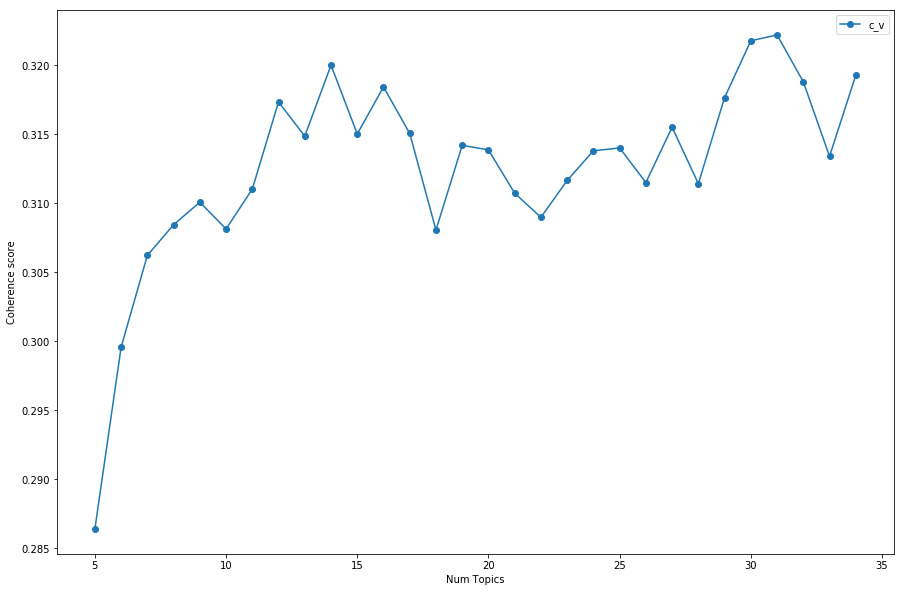

In [25]:
# Plot the required metric
limit=limit_topics; start=start_topics; step=step_topics;
x = range(start, limit, step)
plt.figure(figsize=(15,10))
# plt.plot(x, coherence_values_umass, label='umass')
# plt.plot(x, coherence_values_uci, label='uci')
plt.plot(x, coherence_values_cv, label='c_v', marker='o')
# plt.plot(x, perplexity_values, label='perplexity')
# plt.plot(x, coherence_values_npmi, label='npmi')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(loc='best')
plt.show()

Visualize the topics in pyLDAvis, first prepare the models. pyLDAvis also supports tsne plots, please see this:
https://pyldavis.readthedocs.io/en/latest/modules/API.html.

The next two cells will prepare the PCA and tsne plots for pyLDAvis

In [20]:
# pyLDAvis.enable_notebook()
vis_list = []
for i in range(len(model_list)):
    vis_list.append(pyLDAvisgensim.prepare(model_list[i], corpus, id2word))

C:\Users\karthik.sharma98\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [21]:
vis_list_tsne = []
for i in range(len(model_list)):
    vis_list_tsne.append(pyLDAvisgensim.prepare(model_list[i], corpus, id2word, mds='tsne'))    

C:\Users\karthik.sharma98\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


Save the prepared ldavis models for easy viewing next time:

In [22]:
with open("ldavis_farmers.pkl", "wb") as pickle_out:
    pickle.dump((vis_list, vis_list_tsne), pickle_out)

with open("ldavis_farmers.pkl", "rb") as pickle_in:
    (vis_list, vis_list_tsne) = pickle.load(pickle_in)

In [38]:
#display required topic
pyLDAvis.display(vis_list[9])

In [29]:
#Can export plot to HTML

pyLDAvis.save_html(vis_list_tsne[9], 'lda_tsne_n_topics_14.html')

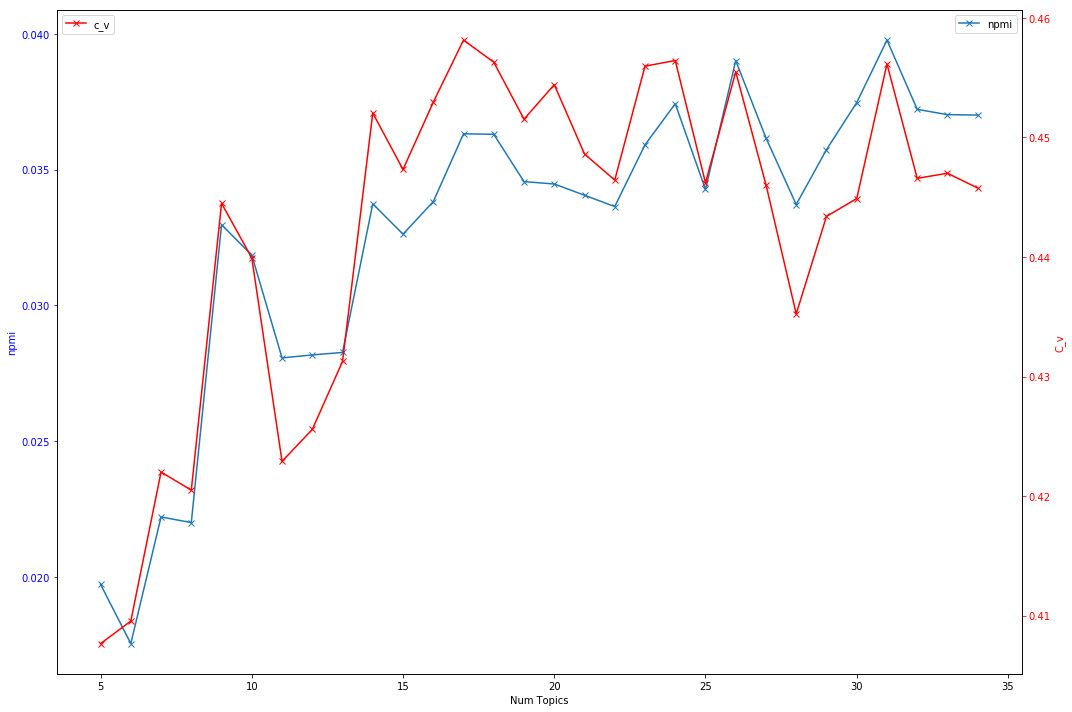

In [76]:
#to plot two metrics on different scales for comparison

fig, ax1 = plt.subplots(figsize=(15,10))
x = range(start_topics, limit_topics, step_topics)
ax1.plot(x, coherence_values_npmi, label='npmi', marker='x')
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('npmi', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(x, coherence_values_cv, label='c_v', color='r', marker='x')
ax2.set_ylabel('C_v', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()

In [ ]:
for i, val in enumerate(coherence_values_cv):
    print(str(i+5) + ": " + str(val))

In [26]:
best_model_idx = 9
num_topics_idx = best_model_idx + start_topics

Now let's say that the best model is model_list\[9\], we will now print out the top 50 words for this model, which has 14 topics present.

In [30]:
top_words = model_list[best_model_idx].show_topics(num_topics=-1, num_words=50, formatted=False)

A way to group documents into topics is to assign topics according to the maximum probability.

If lda = LdaModel() from gensim, and corpus is the corpus made (as shown in one of the above cells where 'corpus' variable is defined)

Note `lda[corpus]` is roughly speaking a list of lists, or 2D matrix. The number of rows is the number of documents and the number of columns is the number of topics. Each matrix element is a tuple of the form (3,0.82) for example. Here 3 refers to the topic index and 0.82 the corresponding probability to be of that topic.

Here in this code, `model_list[best_model_idx][corpus]` is the LDA matrix.

So we assign to each document the topic whose probability of being present in that document is maximum. This is done by statement:

`lda_corpus = [max(prob,key=lambda y:y[1]) for prob in model_list[9][corpus] ]`

The playlists variable is the clusters. It is a list of length = num_clusters, and each element is a list of documents belonging to that cluster

In [1]:
## LDA MATRIX

model_list[best_model_idx][corpus]

In [27]:
lda_corpus = [max(prob,key=lambda y:y[1])
                    for prob in model_list[best_model_idx][corpus] ]
documents = df.text.values.tolist()
playlists = [[] for i in range(num_topics_idx)]
for i, x in enumerate(lda_corpus):
    playlists[x[0]].append(documents[i])


In [28]:
# To view the number of documents in each cluster
lengths = [len(playlists[i]) for i in range(len(playlists))]
lengths

[493, 559, 500, 376, 194, 502, 479, 456, 496, 655, 450, 423, 348, 970]

Let us generate the final file, randomly choosing 20 documents from each cluster. The final file will have the structure:

Num_topics = num_topics

Topic \#0:
    Top 50 words: ....
    
    Sample 20 documents: ...
    
        1. Doc 1
        2. Doc 2
        .
        .
        .

Topic \#1:
    Top 50 words: ....
    
    Sample 20 documents: ...
    
        1. Doc 1
        2. Doc 2
        .
        .
        .
        
        
   

In [31]:
num_documents_to_print_per_cluster = 20
with open("./Aspects/GST/output_LDA_GST_n_" + str(num_topics_idx) + ".txt", "w") as output_file:
    for x,y in zip(top_words, playlists):
        output_file.write("Topic #" + str(x[0]) + " - Top 50 words are: (word - probability)\n")
        for tuple in x[1]:
            output_file.write("\t" + tuple[0] + " -  " + str(tuple[1]) + "\n")

        output_file.write('\n\n')

        for i in range(num_documents_to_print_per_cluster):
            doc_idx = random.randint(0, len(y)-1)

            output_file.write("Document #" + str(i+1) + ":" + "\n")
            output_file.write(y[doc_idx] + "\n")
            output_file.write('\n')


        output_file.write('------------------------------')
        output_file.write('\n')

In [35]:
lda_matrix = np.zeros((len(doc_set), num_topics_idx))
for i,row in enumerate(model_list[best_model_idx][corpus]):
    for tupl in row:
        lda_matrix[i][tupl[0]] = tupl[1]

def extract_sentiments_article(blob):
    text = Text(blob, hint_language_code='hi')
    positive_polarity = 0
    negative_polarity = 0
    for word in text.words:
        total_polarity = word.polarity
        if total_polarity > 0:
            positive_polarity += total_polarity
        else:
            negative_polarity -= total_polarity
    positive_polarity = positive_polarity*1.0/len(text.words)
    negative_polarity = negative_polarity*1.0/len(text.words)
    
    return (positive_polarity, negative_polarity)
    

doc_sentiments = [extract_sentiments_article(doc) for doc in doc_set]

OUTPUT_PATH = "./Aspects/GST"
delimiter = ';'
n_topics = num_topics_idx
fname = OUTPUT_PATH + '/doc_aspect_prob_matrix'+str(n_topics)+'.csv'
fwrite = open(fname, 'w')
fname = OUTPUT_PATH + '/article_data_'+str(n_topics)+'.csv'
f = open(fname, 'w')
for i, row in enumerate(lda_matrix):
    for val in row:
        fwrite.write(str(val)+';')
    fwrite.write('\n')
    aspect = n_topics
    index = np.where(row >= 0.3)[0]
    if index.size == 0:
        f.write(str(aspect) + delimiter + str(newsp_doc_set[i]) + delimiter + str(words_doc_set[i]) + delimiter + str(
            doc_sentiments[i][0]) + delimiter + str(doc_sentiments[i][1]) + delimiter + str(
            url_doc_set[i])  + '\n')
    else:
        for k in index:
            aspect = k
            f.write(str(aspect) + delimiter + str(newsp_doc_set[i]) + delimiter + str(words_doc_set[i]) + delimiter + str(
            doc_sentiments[i][0]) + delimiter + str(doc_sentiments[i][1]) + delimiter + str(
            url_doc_set[i])  + '\n')

In [52]:
#Can export plot to HTML

pyLDAvis.save_html(vis_list[best_model_idx], './farmers/farmers_lda_tsne_n_topics_' + str(num_topics_idx) + '.html')